# SoC zu Beginn

In diesem Notebook wird die Auswirkung des SoC zu Beginn des Ladeprozesses auf den Lastverlauf untersucht.
In den bisherigen Simulationen wurde immer ein SoC von 0 angenommen, was natürlich unrealistisch ist. Da die EVs bei einem niedrigeren SoC eine höhere Ladeleistung zulassen (siehe Ladekurven), besteht die Vermutung, dass die Lastspitzen insgesamt geringer ausfallen, wenn EVs mit einem höheren SoC den Ladevorgang starten.
Als Parkdauer wird weiterhin die Weibull-Verteilung mit den zuvor ermittelten Parametern verwendet

Zunächst wird eine randomisierte **Gleichverteilung** des SoC angenommen. Dafür wird in den Settings angegeben, in welchem Bereich der SoC in % zu Beginn liegen soll. Dann wird über diesen Bereich für jedes ankommende EV ein Wert in diesem Bereich zufällig bestimmt.


soc_begin:  equally_distributed , 9
soc_begin:  equally_distributed , 17
soc_begin:  equally_distributed , 57
'Hyundai_IONIQ5_LongRange' charged 66.35 kWh to 100.39 % SOC
soc_begin:  equally_distributed , 19
soc_begin:  equally_distributed , 43
soc_begin:  equally_distributed , 47
Alle Ladesäulen belegt. Abgewiesene EVs:  1
soc_begin:  equally_distributed , 25
Alle Ladesäulen belegt. Abgewiesene EVs:  2
'Tesla_ModelY' charged 54.22 kWh to 85.13 % SOC
'Hyundai_KONA_64kWh' charged 27.76 kWh to 100.37 % SOC
soc_begin:  equally_distributed , 55
'Tesla_Model_SX_LR' charged 83.28 kWh to 100.28 % SOC
'Tesla_ModelY' charged 37.13 kWh to 100.28 % SOC
'VW_ID3_Pure_45kWh' charged 33.23 kWh to 100.30 % SOC
soc_begin:  equally_distributed , 42
'Tesla_ModelY' charged 47.62 kWh to 100.08 % SOC
soc_begin:  equally_distributed , 20
'Tesla_ModelY' charged 62.94 kWh to 96.75 % SOC
soc_begin:  equally_distributed , 32
'Tesla_Model_SX_LR' charged 62.16 kWh to 94.16 % SOC
soc_begin:  equally_distributed , 4

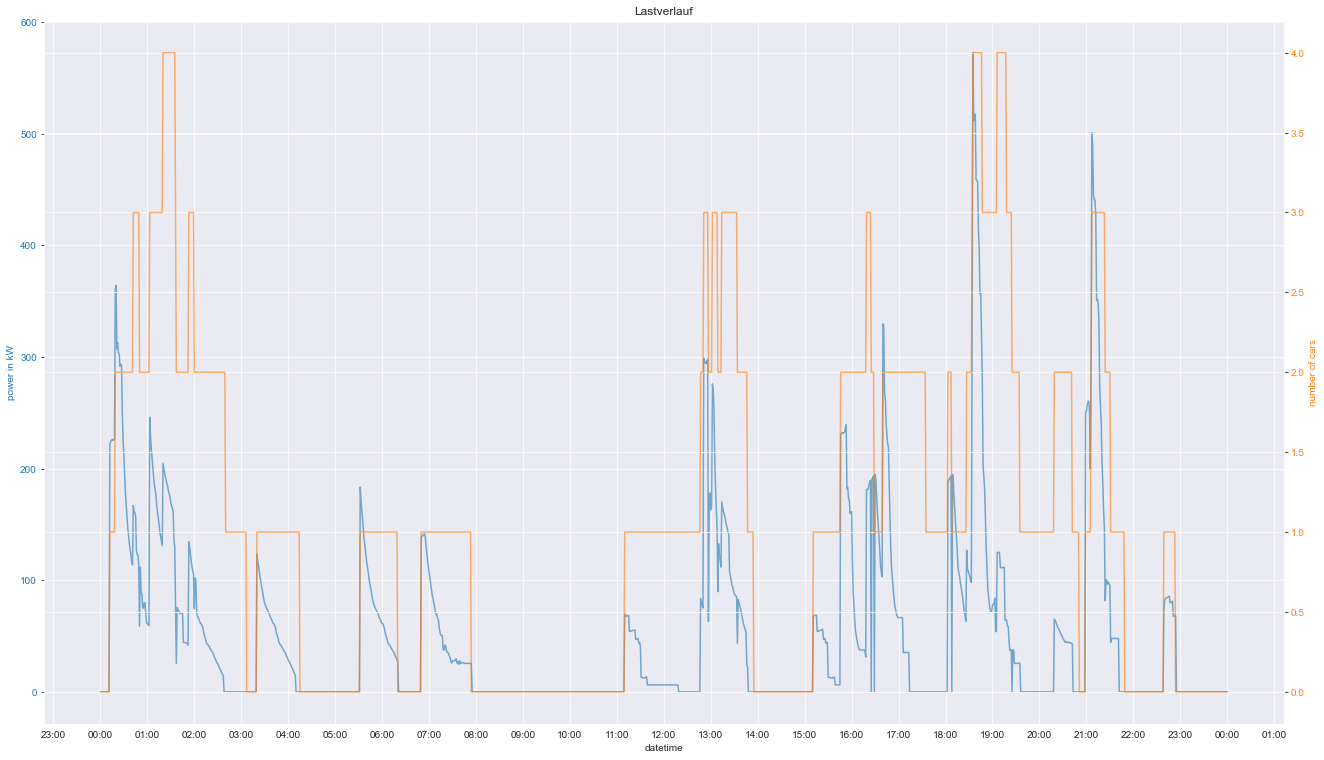

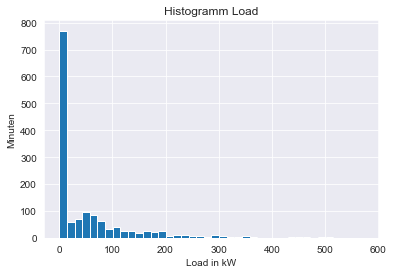

,power_per_minute,number_cars_charging
count,1441.000000,1441.000000
mean,52.297976,1.060375
std,83.717803,1.057955
min,0.000000,0.000000
25%,0.000000,0.000000
50%,6.207372,1.000000
75%,72.103555,2.000000
max,572.728892,4.000000


In [1]:
import importlib
import numpy as np
import model_v2
importlib.reload(model_v2)

df_results_returned_equally_distributed = model_v2.simulation("settings_soc_begin.json")

# soc_begin_global = "equally_distributed"

model_v2.plot(df_results_returned_equally_distributed)
df_results_returned_equally_distributed.describe()

<AxesSubplot:xlabel='power_per_minute', ylabel='Proportion'>

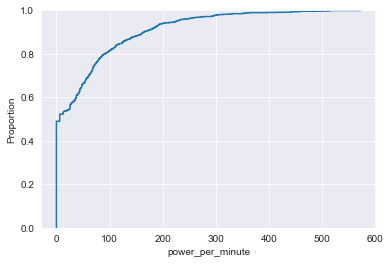

In [2]:
import seaborn as sns
#%matplotlib qt5
# sns.displot(np.asarray(df_results_returned_equally_distributed['power_per_minute']), kind="ecdf")
sns.ecdfplot(data=df_results_returned_equally_distributed, x="power_per_minute")

In [3]:
importlib.reload(model_v2)
model_v2.auswertung(df_results_returned_equally_distributed)

Maximale Last:  572.7288923358516 kWh
Minuten über 60% der maximalen Last (343.64 kWh): 22 Entsprechen  1.53 %
Minuten über 70% der maximalen Last (400.91 kWh): 14 Entsprechen  0.97 %
Minuten über 80% der maximalen Last (458.18 kWh): 8 Entsprechen  0.56 %
Minuten über 90% der maximalen Last (515.46 kWh): 2 Entsprechen  0.14 %
Minuten über 95% der maximalen Last (544.09 kWh): 1 Entsprechen  0.07 %


# Gauss

Als Nächstes wird eine Gauss-Verteilung für den SoC zu Beginn des Ladevorgangs verwendet.


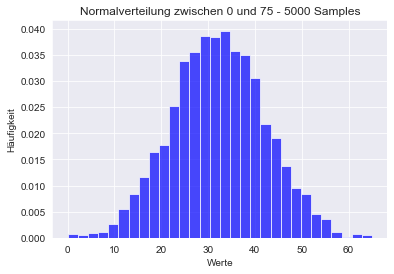

In [4]:
import matplotlib.pyplot as plt
#%matplotlib qt5
# Normalverteilung
mu = 32  # Mittelwert (Halbwegs zwischen 0 und 75)
sigma = 10  # Standardabweichung

# Erzeugen einer Liste von Zufallszahlen mit normaler Verteilung
data = np.random.normal(mu, sigma, 5000)

# Begrenzen der Werte auf den Bereich von 0 bis 75
data = np.clip(data, 0, 65)

# Plot
plt.hist(data, bins=30, density=True, alpha=0.7, color='b')

# Zeigen Sie das Diagramm an
plt.title('Normalverteilung zwischen 0 und 75 - 5000 Samples')
plt.xlabel('Werte')
plt.ylabel('Häufigkeit')
plt.show()


## ZUSÄTZLICH - noch Implementieren

Nach Weibull kann der SoC zu Beginn auch durch eine nach links verzerrte Normalverteilung beschrieben werden. Parameter sind händisch so gewählt dass das Ergebnis mit

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Parameter für die Verteilung
alpha = 5  # Steuerparameter für die Schiefe der Verteilung
loc = 10    # Lageparameter (Durchschnitt)
scale = 23  # Standardabweichung

# Anzahl der generierten Zufallszahlen
num_samples = 1000

# Generiere Zufallszahlen mit einer "left-skewed normal distribution"
data = skewnorm.rvs(alpha, loc=loc, scale=scale, size=num_samples)

# Begrenze die Zufallszahlen auf den Bereich von 0 bis 70
data = np.clip(data, 0, 70)

# Plot der Verteilung
plt.hist(data, bins=30, density=True, alpha=0.7, color='b')

# Plot der Dichtefunktion
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = skewnorm.pdf(x, alpha, loc=loc, scale=scale)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Left-Skewed Normal Distribution')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.show()


soc_begin:  gauss , [33.58701417]
soc_begin:  gauss , [43.7544759]
'2021_FIAT_500e_Hatchback' charged 23.86 kWh to 90.40 % SOC
soc_begin:  gauss , [41.01349706]
'Tesla_Model3_LR' charged 36.52 kWh to 88.03 % SOC
soc_begin:  gauss , [33.67115194]
soc_begin:  gauss , [32.32596137]
'Tesla_Model_SX_LR' charged 47.87 kWh to 81.54 % SOC
'VW_ID3_Pure_45kWh' charged 34.43 kWh to 100.37 % SOC
'Tesla_Model_SX_LR' charged 45.94 kWh to 78.27 % SOC
soc_begin:  gauss , [33.99052102]
'Hyundai_KONA_64kWh' charged 37.29 kWh to 92.26 % SOC
soc_begin:  gauss , [25.69774507]
soc_begin:  gauss , [35.12507722]
'Porsche_Taycan' charged 61.22 kWh to 100.67 % SOC
'Porsche_Taycan' charged 69.98 kWh to 100.62 % SOC
soc_begin:  gauss , [53.86527017]
'Tesla_Model_SX_LR' charged 38.81 kWh to 92.68 % SOC
soc_begin:  gauss , [21.42521245]
soc_begin:  gauss , [42.76505824]
'2021_FIAT_500e_Hatchback' charged 20.42 kWh to 91.37 % SOC
soc_begin:  gauss , [38.65209395]
'Hyundai_IONIQ5_LongRange' charged 57.15 kWh to 100.1

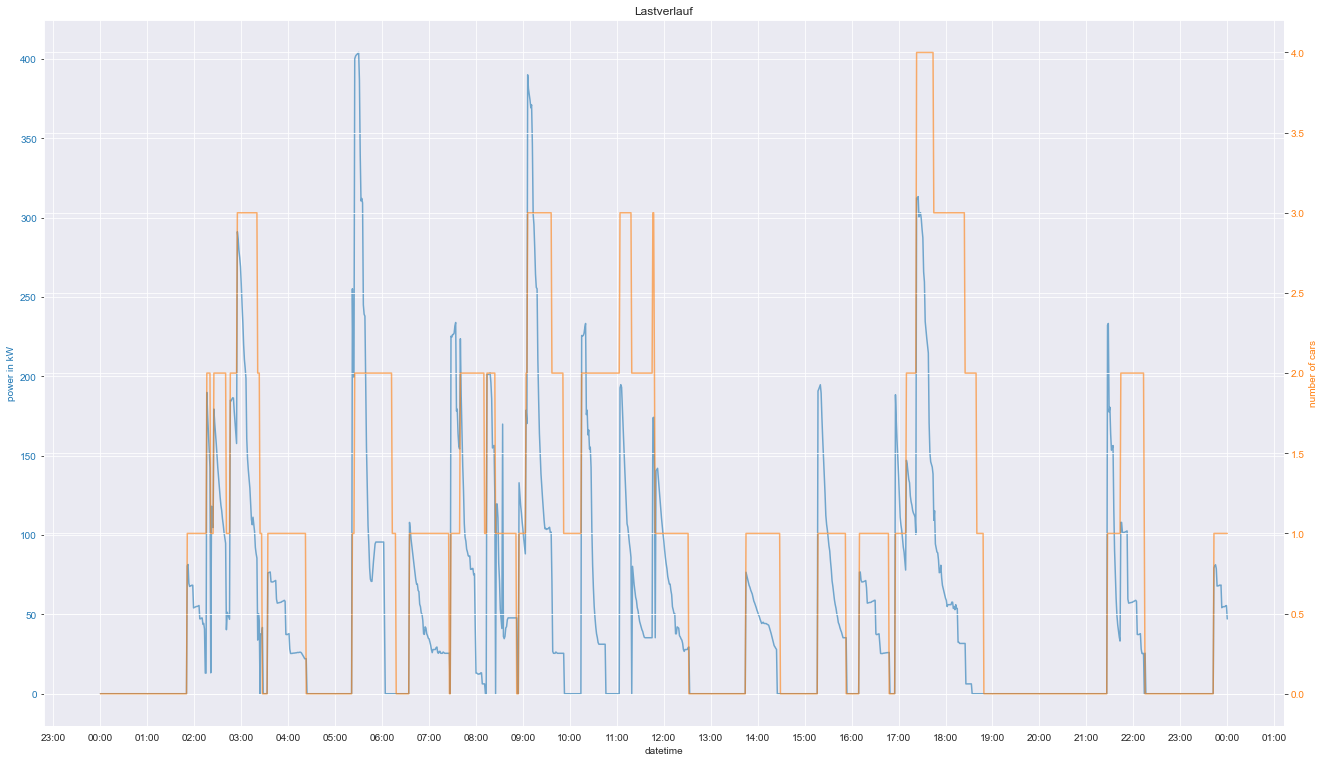

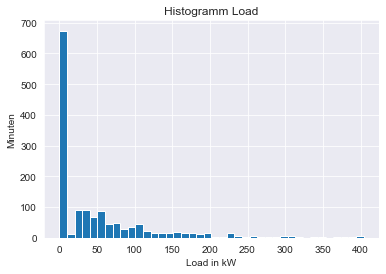

In [5]:
importlib.reload(model_v2)

df_results_returned_gauss = model_v2.simulation("settings_soc_begin.json")
model_v2.plot(df_results_returned_gauss)

<AxesSubplot:xlabel='power_per_minute', ylabel='Proportion'>

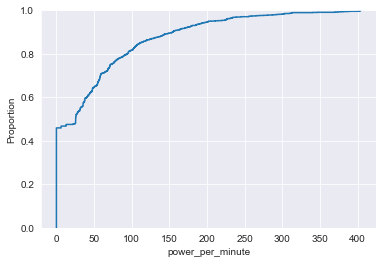

In [6]:
# sns.displot(np.asarray(df_results_returned_gauss['power_per_minute']), kind="ecdf")
sns.ecdfplot(data=df_results_returned_gauss, x="power_per_minute")

Anteil der Minuten, die über einem bestimmten prozentualen Wert der Maximallast liegen

In [7]:
importlib.reload(model_v2)
model_v2.auswertung(df_results_returned_gauss)
df_results_returned_gauss.describe(percentiles=[.5,.75,.9,.95,.98,1])

Maximale Last:  404.1077783426538 kWh
Minuten über 60% der maximalen Last (242.46 kWh): 44 Entsprechen  3.05 %
Minuten über 70% der maximalen Last (282.88 kWh): 31 Entsprechen  2.15 %
Minuten über 80% der maximalen Last (323.29 kWh): 15 Entsprechen  1.04 %
Minuten über 90% der maximalen Last (363.70 kWh): 13 Entsprechen  0.90 %
Minuten über 95% der maximalen Last (383.90 kWh): 8 Entsprechen  0.56 %


,power_per_minute,number_cars_charging
count,1441.000000,1441.000000
mean,51.142614,0.984733
std,74.014483,1.027289
min,0.000000,0.000000
50%,25.485511,1.000000
75%,71.615569,2.000000
90%,154.239924,2.000000
95%,202.053889,3.000000
98%,288.131554,3.000000
100%,404.107778,4.000000


# "Worst-Case" (SOC = 0)

In der folgenden Simulation wird der SOC zu Beginn auf 0 gesetzt. Dies sollte die größten Lastspitzen generieren.

soc_begin:  0 , 0
soc_begin:  0 , 0
soc_begin:  0 , 0
soc_begin:  0 , 0
'Porsche_Taycan' charged 94.03 kWh to 100.68 % SOC
'Hyundai_IONIQ5_LongRange' charged 67.86 kWh to 93.47 % SOC
'Hyundai_KONA_64kWh' charged 64.25 kWh to 100.39 % SOC
soc_begin:  0 , 0
soc_begin:  0 , 0
'Tesla_ModelY' charged 82.07 kWh to 100.08 % SOC
soc_begin:  0 , 0
soc_begin:  0 , 0
'Tesla_ModelY' charged 82.07 kWh to 100.08 % SOC
'2021_FIAT_500e_Hatchback' charged 11.96 kWh to 28.48 % SOC
'Hyundai_KONA_64kWh' charged 64.25 kWh to 100.39 % SOC
soc_begin:  0 , 0
soc_begin:  0 , 0
soc_begin:  0 , 0
soc_begin:  0 , 0
Alle Ladesäulen belegt. Abgewiesene EVs:  1
'Tesla_Model_SX_LR' charged 51.34 kWh to 51.34 % SOC
soc_begin:  0 , 0
'2021_FIAT_500e_Hatchback' charged 41.39 kWh to 98.55 % SOC
soc_begin:  0 , 0
'Hyundai_KONA_64kWh' charged 64.25 kWh to 100.39 % SOC
'Porsche_Taycan' charged 94.03 kWh to 100.68 % SOC
'2021_FIAT_500e_Hatchback' charged 41.60 kWh to 99.04 % SOC
soc_begin:  0 , 0
'2021_FIAT_500e_Hatchback' c

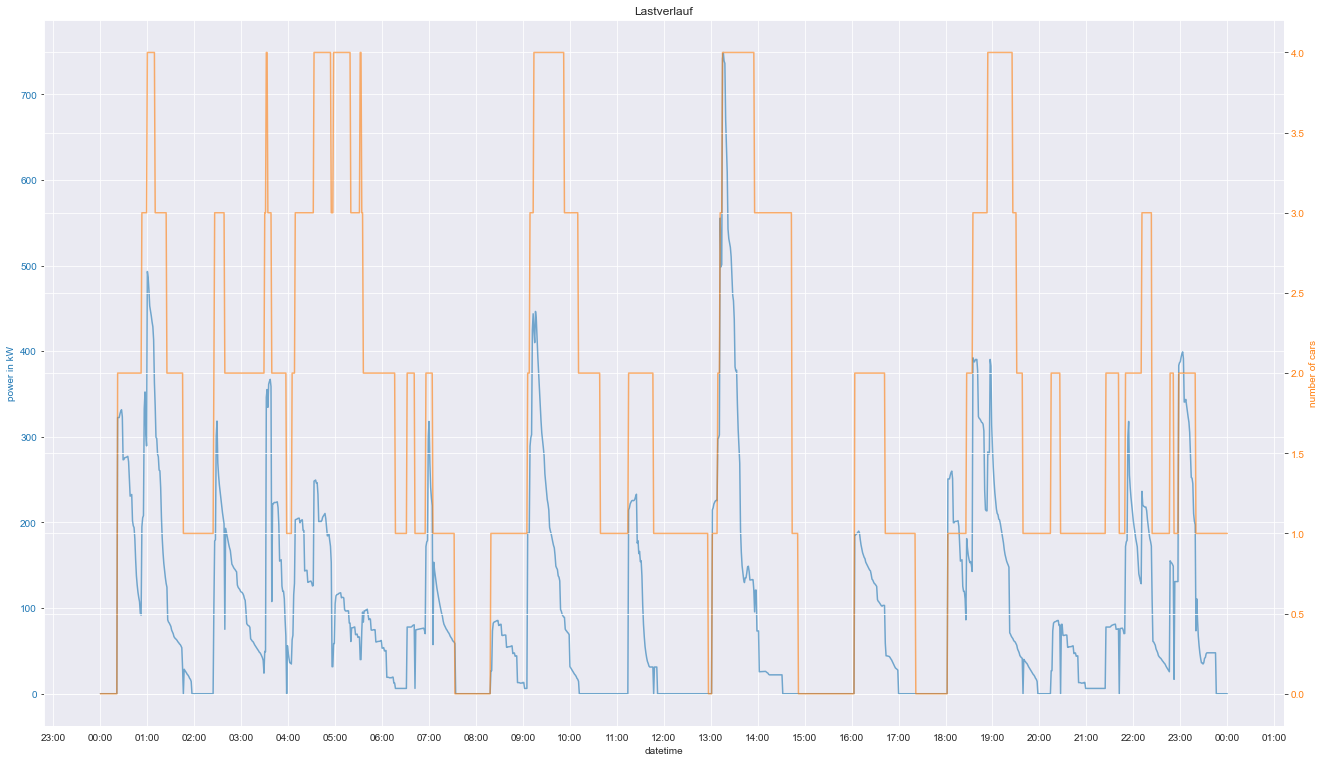

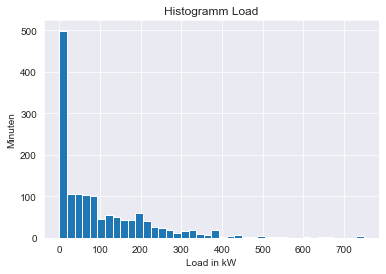

In [8]:
importlib.reload(model_v2)

df_results_returned_SOC_empty = model_v2.simulation("settings_soc_begin.json")
model_v2.plot(df_results_returned_SOC_empty)

In [9]:
importlib.reload(model_v2)
model_v2.auswertung(df_results_returned_SOC_empty)

Maximale Last:  748.818595178096 kWh
Minuten über 60% der maximalen Last (449.29 kWh): 22 Entsprechen  1.53 %
Minuten über 70% der maximalen Last (524.17 kWh): 11 Entsprechen  0.76 %
Minuten über 80% der maximalen Last (599.05 kWh): 7 Entsprechen  0.49 %
Minuten über 90% der maximalen Last (673.94 kWh): 4 Entsprechen  0.28 %
Minuten über 95% der maximalen Last (711.38 kWh): 4 Entsprechen  0.28 %


# Vergleich der verschiedenen SOCs

Nun werden alle 3 Methoden für den SOC zu Beginn miteinander vergleichen:

In [13]:
%matplotlib qt5
plt.figure(figsize=(9, 6))

sns.ecdfplot(data=df_results_returned_equally_distributed, x="power_per_minute", label="gleichverteilt")
sns.ecdfplot(data=df_results_returned_gauss, x="power_per_minute", label = "Gauß-Normalverteilung")
sns.ecdfplot(data=df_results_returned_SOC_empty, x="power_per_minute", label = "SoC = 0")

plt.ylim(0, 1.1)
plt.legend()
plt.show()